<a href="https://colab.research.google.com/github/ergegananputra/learn_ai_mushroom_classification/blob/main/Kelompok_10_Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 10**
dataset : https://archive.ics.uci.edu/dataset/73/mushroom
<br>
Anggota:
*   Adiel Boanerge Gananputra (22-500051-SV-21386)
*   Isan Faizun Hidar (22-500411-SV-21417)
*   Dwi Agung Febriyanto (22-493887-SV-20746)





In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install ucimlrepo

# Settings

In [ ]:
# ['cap-shape',
#  'cap-surface',
#  'cap-color',
#  'bruises',
#  'odor',
#  'gill-attachment',
#  'gill-spacing',
#  'gill-size',
#  'gill-color',
#  'stalk-shape',
#  'stalk-root',
#  'stalk-surface-above-ring',
#  'stalk-surface-below-ring',
#  'stalk-color-above-ring',
#  'stalk-color-below-ring',
#  'veil-type',
#  'veil-color',
#  'ring-number',
#  'ring-type',
#  'spore-print-color',
#  'population',
#  'habitat']


isDeletingStalkRoot : bool = False

# Read the Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
df_X = mushroom.data.features
df_y = mushroom.data.targets

# metadata
print(mushroom.metadata)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
# variable information
print(mushroom.variables)

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

In [ ]:
print(df_X)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

In [ ]:
df_y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [ ]:
df_X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Check percentase target class

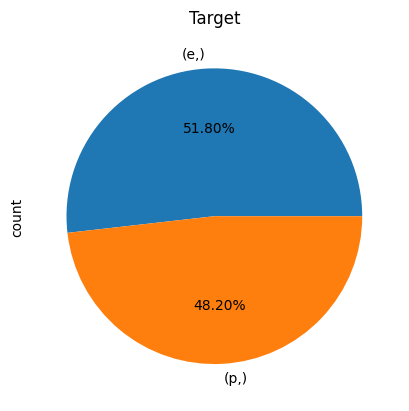

In [ ]:
import matplotlib.pyplot as plt

data = df_y.value_counts()

data.plot(kind='pie',autopct='%.2f%%')
plt.title("Target")
plt.show()

# Check Missing Value

In [ ]:
df_X.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
df_y.isnull().sum()

poisonous    0
dtype: int64

In [ ]:
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

numerical_encoding_map = {
    'cap-shape': {'b': 0, 'c': 1, 'x': 2, 'f': 3, 'k': 4, 's': 5}, 'cap-surface': {'f': 0, 'g': 1, 'y': 2, 's': 3}, 'cap-color': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9}, 'bruises': {'t': 0, 'f': 1}, 'odor': {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8}, 'gill-attachment': {'a': 0, 'd': 1, 'f': 2, 'n': 3}, 'gill-spacing': {'c': 0, 'w': 1, 'd': 2}, 'gill-size': {'b': 0, 'n': 1}, 'gill-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'g': 4, 'r': 5, 'o': 6, 'p': 7, 'u': 8, 'e': 9, 'w': 10, 'y': 11}, 'stalk-shape': {'e': 0, 't': 1}, 'stalk-root': {'b': 0, 'c': 1, 'u': 2, 'e': 3, 'z': 4, 'r': 5, 'unknown': 6}, 'stalk-surface-above-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3}, 'stalk-surface-below-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3}, 'stalk-color-above-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8}, 'stalk-color-below-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8}, 'veil-type': {'p': 0, 'u': 1}, 'veil-color': {'n': 0, 'o': 1, 'w': 2, 'y': 3}, 'ring-number': {'n': 0, 'o': 1, 't': 2}, 'ring-type': {'c': 0, 'e': 1, 'f': 2, 'l': 3, 'n': 4, 'p': 5, 's': 6, 'z': 7}, 'spore-print-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'r': 4, 'o': 5, 'u': 6, 'w': 7, 'y': 8}, 'population': {'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5}, 'habitat': {'g': 0, 'l': 1, 'm': 2, 'p': 3, 'u': 4, 'w': 5, 'd': 6}}


encoding_map = {
    "cap-shape"       : {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"},
    "cap-surface"     : {"fibrous":"f","grooves":"g","scaly":"y","smooth":"s"},
    "cap-color"       : {"brown":"n","buff":"b","cinnamon":"c","gray":"g","green":"r", "pink":"p","purple":"u","red":"e","white":"w","yellow":"y"},
    "bruises"         : {"bruises":"t","no":"f"},
    "odor"            : {"almond":"a","anise":"l","creosote":"c","fishy":"y","foul":"f", "musty":"m","none":"n","pungent":"p",'spicy':"s"},
    "gill-attachment" : {"attached":"a","descending":"d","free":"f","notched":"n"},
    "gill-spacing"    : {"close":"c","crowded":"w",'distant':"d"},
    "gill-size"       : {"broad":"b","narrow":"n"},
    "gill-color"      : {"black":"k",'brown':"n","buff":"b","chocolate":"h",'gray':"g", 'green':"r",'orange':"o","pink":"p","purple":"u","red":"e", "white":"w",'yellow':"y"},
    "stalk-shape"     : {"enlarging":"e",'tapering':"t"},
    "stalk-root"      : {"bulbous":"b","club":"c","cup":"u",'equal':"e", 'rhizomorphs':"z",'rooted':"r",'missing':"unknown", "?" : "unknown"},
    "stalk-surface-above-ring" : {"fibrous":"f","scaly":"y",'silky':"k","smooth":"s"},
    "stalk-surface-below-ring" : {"fibrous":"f",'scaly':"y",'silky':"k",'smooth':"s"},
    "stalk-color-above-ring" : {"brown":"n",'buff':"b",'cinnamon':"c",'gray':"g","orange":"o", 'pink':"p","red":"e",'white':"w",'yellow':"y"},
    "stalk-color-below-ring" : {"brown":"n",'buff':"b",'cinnamon':"c",'gray':"g",'orange':"o", 'pink':"p",'red':"e",'white':"w",'yellow':"y"},
    "veil-type"       : {"partial":"p",'universal':"u"},
    "veil-color"      : {"brown":"n",'orange':"o",'white':"w",'yellow':"y"},
    "ring-number"     : {'none':"n",'one':"o","two":"t"},
    "ring-type"       : {"cobwebby":"c","evanescent":"e","flaring":"f",'large':"l", 'none':"n","pendant":"p",'sheathing':"s",'zone':"z"},
    "spore-print-color" : {"black":"k","brown":"n",'buff':"b",'chocolate':"h",'green':"r", 'orange':"o",'purple':"u",'white':"w","yellow":"y"},
    "population"      : {"abundant":"a","clustered":"c",'numerous':"n", 'scattered':"s",'several':"v",'solitary':"y"},
    "habitat"         : {"grasses":"g",'leaves':"l",'meadows':"m",'paths':"p", 'urban':"u",'waste':"w","woods":"d"}
}

def custom_encoder(value, feature_name):
  """Encodes a categorical value using the provided encoding scheme."""
  try:
    return numerical_encoding_map[feature_name][value]
  except KeyError:
    print(f"\t the thing is {value}, {feature_name}")
    raise

# le = LabelEncoder()
# df_y= le.fit_transform(df_y['poisonous'])



# Hapus stalk-root atau isi stalk-root kosong dengan unknown
df_X = df_X.drop(labels="stalk-root", axis=1) if (isDeletingStalkRoot) else df_X.fillna(value={'stalk-root': 'unknown'})

cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
# le = LabelEncoder()
# for i in cat_features:
#   df_X[i] = le.fit_transform(df_X[i])

# Encode categorical features using custom_encoder
for feature in cat_features:
  df_X[feature] = df_X[feature].apply(lambda x: custom_encoder(x, feature))


X = df_X.astype(float).values
y = df_y.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df_X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,2,0,1,0,0,...,3,7,7,0,2,1,5,0,3,4
1,2,3,9,0,0,2,0,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,3,8,0,1,2,0,0,1,0,...,3,7,7,0,2,1,5,1,2,2
3,2,2,8,0,7,2,0,1,1,0,...,3,7,7,0,2,1,5,0,3,4
4,2,3,3,1,6,2,1,0,0,1,...,3,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,0,1,6,0,0,0,11,0,...,3,4,4,0,1,1,5,2,1,1
8120,2,3,0,1,6,0,0,0,11,0,...,3,4,4,0,0,1,5,2,4,1
8121,3,3,0,1,6,0,0,0,1,0,...,3,4,4,0,1,1,5,2,1,1
8122,4,2,0,1,3,2,0,1,2,1,...,2,7,7,0,2,1,1,7,4,1


In [ ]:
X

array([[2., 3., 0., ..., 0., 3., 4.],
       [2., 3., 9., ..., 1., 2., 0.],
       [0., 3., 8., ..., 1., 2., 2.],
       ...,
       [3., 3., 0., ..., 2., 1., 1.],
       [4., 2., 0., ..., 7., 4., 1.],
       [2., 3., 0., ..., 5., 1., 1.]])

In [ ]:
y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [ ]:
X_train

array([[-0.56013972,  1.06523619, -0.96326683, ..., -0.0288249 ,
         0.28013546,  0.30393194],
       [-0.56013972, -1.4782687 , -0.38220008, ..., -1.09080147,
         1.07299272,  1.09376604],
       [-0.56013972, -1.4782687 , -0.38220008, ..., -0.0288249 ,
         0.28013546,  1.09376604],
       ...,
       [ 0.55076172,  0.21740123, -1.25380021, ..., -0.73680928,
         1.07299272, -0.09098511],
       [ 1.66166316,  1.06523619,  0.77993343, ...,  1.38714385,
         0.28013546, -0.09098511],
       [ 1.66166316, -1.4782687 , -0.38220008, ...,  1.38714385,
        -1.30557906, -1.27573626]])

In [ ]:
X_test

array([[ 0.55076172, -1.4782687 , -1.25380021, ..., -0.73680928,
        -0.5127218 , -1.27573626],
       [ 0.55076172,  1.06523619,  0.77993343, ...,  1.38714385,
         0.28013546, -0.88081921],
       [-0.56013972,  0.21740123, -1.25380021, ...,  1.38714385,
         0.28013546, -0.88081921],
       ...,
       [-0.56013972, -1.4782687 , -0.38220008, ..., -0.0288249 ,
         0.28013546,  1.09376604],
       [-0.56013972,  0.21740123, -1.25380021, ..., -0.73680928,
        -0.5127218 , -0.09098511],
       [-0.56013972, -1.4782687 , -0.38220008, ..., -1.09080147,
         0.28013546,  1.09376604]])

In [ ]:
print(X_test)

[[ 0.55076172 -1.4782687  -1.25380021 ... -0.73680928 -0.5127218
  -1.27573626]
 [ 0.55076172  1.06523619  0.77993343 ...  1.38714385  0.28013546
  -0.88081921]
 [-0.56013972  0.21740123 -1.25380021 ...  1.38714385  0.28013546
  -0.88081921]
 ...
 [-0.56013972 -1.4782687  -0.38220008 ... -0.0288249   0.28013546
   1.09376604]
 [-0.56013972  0.21740123 -1.25380021 ... -0.73680928 -0.5127218
  -0.09098511]
 [-0.56013972 -1.4782687  -0.38220008 ... -1.09080147  0.28013546
   1.09376604]]


# Logistic Regression

In [ ]:
type(X_test)

numpy.ndarray

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  0.9577522559474979
Precision  0.9576238900645634
Recall  0.9579799355615328
Confusion matrix  [[1195   62]
 [  41 1140]]
F1  0.9577307438587171


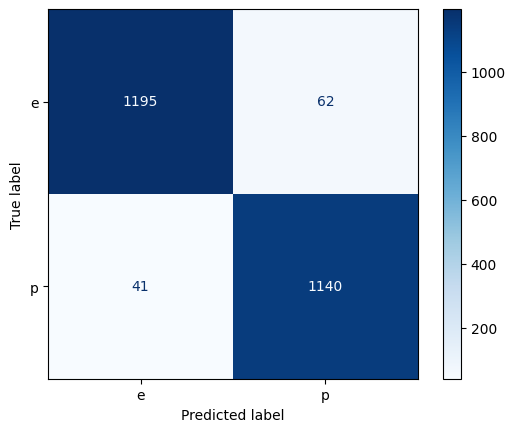

In [ ]:
# LOGISTIC REGRESSION

#mulai melakukan modelling. model ML learning/ belajar dari training set
import numpy as np

model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)
# y_pred jika di print out keluar vector prediksi nya

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

from sklearn.metrics import f1_score
print('F1 ',f1_score(y_test, y_pred, average='macro'))

In [ ]:
model.coef_

array([[-0.24730895,  1.22919611,  0.41386619,  2.15518578, -0.01973882,
        -0.25093017, -4.4660287 ,  4.85265691, -0.25307323,  0.48133991,
        -6.83477003, -0.60210583, -0.07229686, -0.62103942,  0.78324188,
         0.        ,  0.14945875,  0.08300423, -1.70735996,  1.13865624,
        -0.96588749, -0.4955598 ]])

In [ ]:
model.intercept_

array([-1.59229933])

# Prediksi dengan Model Logistic Regression

In [ ]:
# UJI COBA PREDIKSI

new_mushroom = {
  'cap-shape' : 'bell',
  'cap-surface' : 'smooth' ,
  'cap-color' : 'brown',
  'bruises' : 'no',
  'odor': 'musty',
  'gill-attachment': 'attached',
  'gill-spacing': 'close',
  'gill-size': 'narrow',
  'gill-color': 'white',
  'stalk-shape': 'tapering',
  'stalk-root': "missing",
  'stalk-surface-above-ring': 'smooth',
  'stalk-surface-below-ring': 'smooth',
  'stalk-color-above-ring': 'brown',
  'stalk-color-below-ring': 'white',
  'veil-type': 'universal',
  'veil-color': 'yellow',
  'ring-number': 'none',
  'ring-type': 'flaring',
  'spore-print-color': 'chocolate',
  'population': 'clustered',
  'habitat' : 'paths'
}

input_list = input("Masukkan Input : ").lower().split(",")
if len(input_list) != len(new_mushroom):
    print("Error: You must provide exactly", len(new_mushroom), "values.")
else:
    # Assign the input values to the dictionary
    for key, value in zip(new_mushroom.keys(), input_list):
        new_mushroom[key] = value.strip()

numeric_value = lambda feature, value : numerical_encoding_map[feature][encoding_map[feature][value]]

encoded_mushroom = {}
for feature, value in new_mushroom.items():
  # Use the full name directly from new_mushroom
  encoded_mushroom[feature] = numeric_value(feature, value)


input_mushroom = np.array([list(encoded_mushroom.values())])

prediksi_kelas = model.predict(input_mushroom)
isPoisonus = "tidak" if prediksi_kelas[0] == 'e' else "ya, beracun"

print(f"Apakah jamur tersebut beracun : {isPoisonus}")

Masukkan Input : CONVEX,SCALY,RED,NO,FISHY,FREE,CLOSE,NARROW,BUFF,TAPERING,?,SMOOTH,SMOOTH,PINK,WHITE,PARTIAL,WHITE,ONE,EVANESCENT,WHITE,SEVERAL,PATHS
Apakah jamur tersebut beracun : ya, beracun


# K nearest neighbour

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy  0.9983593109105825
Precision  0.9984139571768438
Recall  0.9983065198983911
Confusion matrix  [[1257    0]
 [   4 1177]]


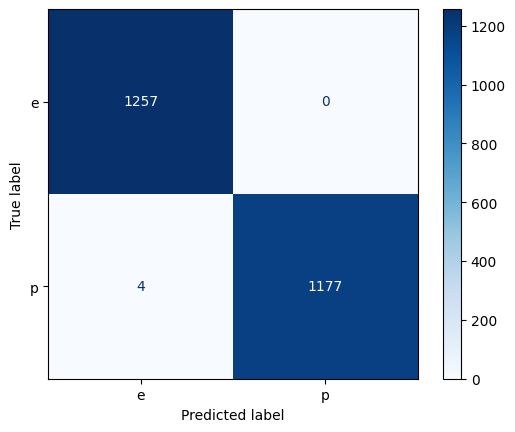

In [ ]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

# Random Forest

<ipython-input-794-5de91c028130>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[1257    0]
 [   0 1181]]


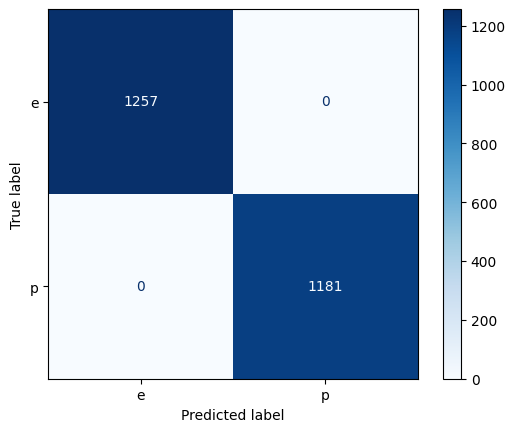

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

# AdaBoost

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[1257    0]
 [   0 1181]]


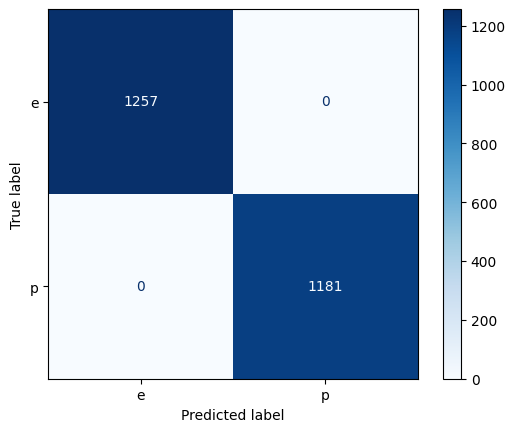

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

# Uji COBA RANDOM FOREST

In [ ]:
model=RandomForestClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# hitung akurasi
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("Akurasi Training:", accuracy_train)
print("Akurasi Testing:", accuracy_test)

<ipython-input-796-994e697a8b47>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Akurasi Training: 1.0
Akurasi Testing: 1.0


In [ ]:
cat_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']